<a href="https://colab.research.google.com/github/KendallScott/Machine-Learning/blob/main/Copy_of_Copy_of_Mini_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Contributors
* Tadd Backus
* Kendall Scott
* Austin Webb
* Milan Patel


In [141]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [142]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import SGDClassifier

pd.set_option('display.max_columns',None)

In [143]:
forest_cover_type = pd.read_csv('covtype.csv')
forest_cover_type.head()
# Creating a new dataset that only contains the most common cover types
#updated to all
# Renaming wilderness areas
forestDF = forest_cover_type
forestDF.rename(columns={'Wilderness_Area1':'Rawah','Wilderness_Area2':'Neota','Wilderness_Area3':'Comanche Peak','Wilderness_Area4':'Cache la Poudre'},inplace=True)
forestDF.head()

forestDF = forestDF.astype({'Cover_Type':'string'})
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('1','Spruce/Fir')
forestDF['Cover_Type'] = forestDF['Cover_Type'].str.replace('2','Lodgepole Pine')
forestDF['Cover_Type'].describe().transpose()
# Coding Lodgepole Pine as 1 and Spruce/Fir as 0

count             581012
unique                 7
top       Lodgepole Pine
freq              283301
Name: Cover_Type, dtype: object

In [144]:
# Lodgepole Pine = 1 | Spruce/Fir = 0
forestDF['treeType'] = forestDF.Cover_Type=='Lodgepole Pine'
forestDF = forestDF.replace(np.nan, 0)
forestDF.treeType = forestDF.treeType.astype(np.int64)

# Deleting original cover type column
if 'Cover_Type' in forestDF:
    del forestDF['Cover_Type']

#### Renaming cover type to actual names

## Create Models

We decided to compare 2 different logistic regression tactics, in order to determine what model worked best to predict Cover Type.

For our first model, we decided to look at the most prominent cover types only (Spruce/Fir and Lodgepole Pine). 

The other model predicted all cover types, and was included in our intial analysis of this dataset. 

After comparing the results, we will make a recommendation for which model to implement in order to predict Cover Type.


## Create Models 50

Create a logistic regression model and a support vector machine model for the classification task involved with your dataset. Assess how well each model performs (use 80/20 training/testing split for your data). Adjust parameters of the models to make them more accurate. If your dataset size requires the use of stochastic gradient descent, then linear kernel only is fine to use. That is, the SGDClassifier is fine to use for optimizing logistic regression and linear support vector machines. For many problems, SGD will be required in order to train the SVM model in a reasonable timeframe. 

# Logistic Regression

Due to the high colinearity between the Hillshade variables, we limited the data down to Hillshade noon only.

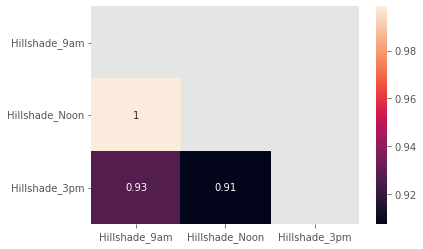

In [145]:
simpleStats = forest_cover_type.describe()

simpleStats.reset_index(inplace=True)
num_col = forest_cover_type._get_numeric_data().columns
simpleStats = simpleStats[simpleStats['index'] != 'count']

# make list of hillside variables
hillside = ['Hillshade_9am','Hillshade_Noon',
                        'Hillshade_3pm']
hillside_df=simpleStats[hillside]

# Correlation df
cormat = hillside_df.corr()
# Round to two decimals
round(cormat, 2)

# heatmap of the correlations
matrix = np.triu(np.ones_like(cormat, dtype=bool))
sns.heatmap(cormat, annot = True, mask = matrix);

In [146]:
forestDF= forestDF.drop(['Hillshade_3pm', 'Hillshade_9am'], axis=1)

In [147]:
forestFullDF = forestDF.copy()

In [148]:
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

In [149]:
#Creating cross validation object
num_cv_iter = 10
num_instances = len(Y)
cv_object = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)
print(cv_object)

ShuffleSplit(n_splits=10, random_state=None, test_size=0.2, train_size=None)


In [150]:
# Creating logistic regression object
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

In [151]:
#Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.6170064456167225
Confusion Matrix 
 [[38432 21067]
 [23438 33266]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.6102854487405661
Confusion Matrix 
 [[39287 20216]
 [25070 31630]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.6127036307152139
Confusion Matrix 
 [[39466 20048]
 [24957 31732]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.6089343648614924
Confusion Matrix 
 [[39443 20032]
 [25411 31317]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.6125315181191535
Confusion Matrix 
 [[39585 20133]
 [24892 31593]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.610732941490323
Confusion Matrix 
 [[39562 20208]
 [25026 31407]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.614252644079757
Confusion Matrix 
 [[39517 19896]
 [24929 31861]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.6115848988408217
Confusion Matrix 
 [[39349 20173]
 [24962 31719]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 8 ****
Accuracy 0.6121958985568359
Confusion Matrix 
 [[39515 20066]
 [24998 31624]]
****Iteration 9 ****
Accuracy 0.6124884899701385
Confusion Matrix 
 [[39520 19922]
 [25108 31653]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

[0.61316833 0.60893436 0.61152466 0.61075015 0.61171398 0.61234219
 0.6124971  0.61397726 0.60906345 0.61194634]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


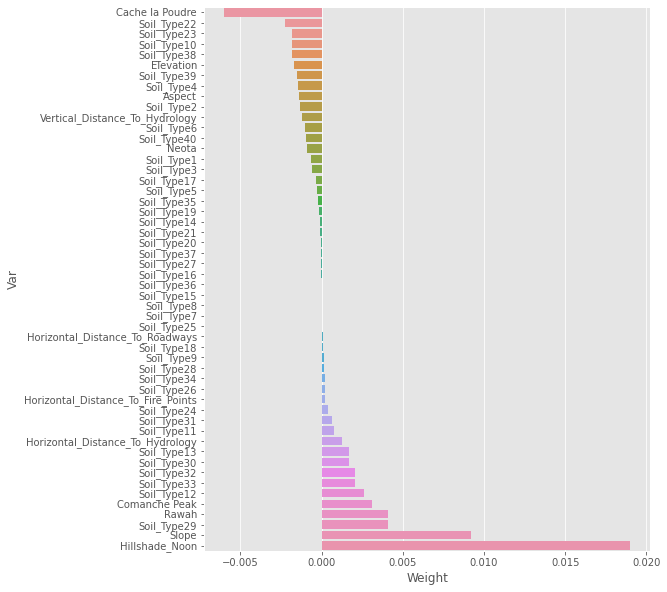

In [153]:
logWeights = pd.Series(lr_clf.coef_[0],index=forestDF.columns)
logWeights = pd.DataFrame({'Var':logWeights.index,'Weight':logWeights.values})
logWeights = logWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=logWeights)

We decided to leverage Random Forest to eliminate some of the variables included in the model, to see if there is an increase in performance in a simpler model.

In [154]:
# Feature Importance Graph
# Takes about five minutes
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 20)
rf.fit(X, Y)

RandomForestRegressor(n_estimators=20)

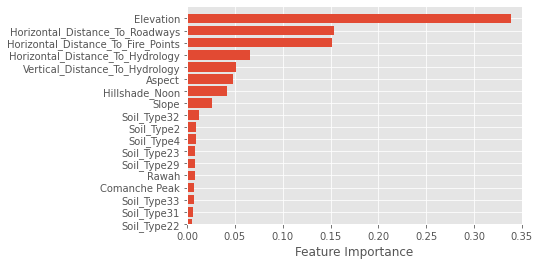

In [155]:
sort = rf.feature_importances_.argsort()
plt.barh(forestDF.columns.values[sort], rf.feature_importances_[sort])
plt.xlabel('Feature Importance')
plt.axis([0, 0.35, 34, 52])
plt.show()

In [156]:
forestDF.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Horizontal_Distance_To_Fire_Points', 'Rawah',
       'Neota', 'Comanche Peak', 'Cache la Poudre', 'Soil_Type1', 'Soil_Type2',
       'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
       'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'],
      dtype='object')

Based on the importance output, we decided to build a simplified model on:

*   Elevation
*   Horizontal Distance to Fire Points
*   Soil Type: 32, 4, 2, 23, 29, 33, 31, 22
*   Horizontal Distance to Roadways
*   Wilderness Area: Comanche Peak, Neota, Rawah
*   Horizontal Distance To Hydrology
*   Hillshade noon
*   Aspect
*   Slope




In [157]:
forestDF_new = pd.DataFrame().assign(
                treeType=Y, 
                Elevation=forestDF['Elevation'], 
                Horizontal_Distance_To_Fire_Points=forestDF['Horizontal_Distance_To_Fire_Points'],
                Soil_Type32=forestDF['Soil_Type32'],
                Soil_Type4=forestDF['Soil_Type4'],
                Soil_Type2=forestDF['Soil_Type2'],
                Soil_Type23=forestDF['Soil_Type23'],
                Soil_Type29=forestDF['Soil_Type29'],
                Soil_Type33=forestDF['Soil_Type33'],
                Soil_Type31=forestDF['Soil_Type31'],
                Soil_Type22=forestDF['Soil_Type22'],
                Horizontal_Distance_To_Roadways=forestDF['Horizontal_Distance_To_Roadways'],
                Comanche_Peak=forestDF['Comanche Peak'], 
                Neota=forestDF['Neota'], 
                Rawah=forestDF['Rawah'], 
                Horizontal_Distance_To_Hydrology=forestDF['Horizontal_Distance_To_Hydrology'],
                Hillshade_Noon=forestDF['Hillshade_Noon'],
                Aspect=forestDF['Aspect'],
                Slope=forestDF['Slope']
                                                      )


In [158]:
# Assign specific features to two different variables
if 'treeType' in forestDF:
    Y = forestDF['treeType'].values
    del forestDF['treeType']
    X = forestDF.values

In [159]:
# Re-creating logistic regression object
lr_clf = LogisticRegression(penalty='l2',C=1.0,class_weight=None)

In [ ]:
#Running logistic regression on 10 random test/train splits
iter_num = 0

for iter_num, (train_indices,test_indices) in enumerate(cv_object.split(X,Y)):
    lr_clf.fit(X[train_indices],Y[train_indices])
    y_hat = lr_clf.predict(X[test_indices])
    
    print('****Iteration',iter_num,'****')
    print('Accuracy',mt.accuracy_score(Y[test_indices],y_hat))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_indices],y_hat))
    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 0 ****
Accuracy 0.6104403500770204
Confusion Matrix 
 [[39578 19858]
 [25410 31357]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 1 ****
Accuracy 0.6229099076615923
Confusion Matrix 
 [[38828 20886]
 [22933 33556]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 2 ****
Accuracy 0.61026823748096
Confusion Matrix 
 [[39308 20054]
 [25234 31607]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 3 ****
Accuracy 0.6111976454996859
Confusion Matrix 
 [[39408 19845]
 [25335 31615]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 4 ****
Accuracy 0.6118000395858971
Confusion Matrix 
 [[39530 20260]
 [24850 31563]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 5 ****
Accuracy 0.6133404473206372
Confusion Matrix 
 [[39497 19856]
 [25075 31775]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 6 ****
Accuracy 0.6109480822353984
Confusion Matrix 
 [[39367 20060]
 [25149 31627]]


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


****Iteration 7 ****
Accuracy 0.6118086452157001
Confusion Matrix 
 [[39263 19996]
 [25113 31831]]


In [ ]:
accuracies = cross_val_score(lr_clf, X, y=Y, cv=cv_object) # this also can help with parallelism
print(accuracies)

## Model Advantages 10
Discuss the advantages of each model for each classification task. Does one type of model offer superior performance over another in terms of prediction accuracy? In terms of training time or efficiency? Explain in detail.

## Interpret Feature Importance 30

Use the weights from logistic regression to interpret the importance of different features for the classification task. Explain your interpretation in detail. Why do you think some variables are more important?

## Looking at weights of the model

In [ ]:
weights = lr_clf.coef_.T
varNames = forestDF_new.columns
for coef, name in zip(weights,varNames):
    print(name,'has weight of',coef[0])

### Scaling the weights for interpretability

In [ ]:
sclObj = StandardScaler()
sclObj.fit(X[train_indices])

X_trainScaled = sclObj.transform(X[train_indices])
x_testScaled = sclObj.transform(X[test_indices])

lrs_clf = LogisticRegression(penalty='l2',C=0.05)
lrs_clf.fit(X_trainScaled,Y[train_indices])

y_hatS = lrs_clf.predict(x_testScaled)

acc = mt.accuracy_score(Y[test_indices],y_hatS)
conf = mt.confusion_matrix(Y[test_indices],y_hatS)
print('accuracy:',acc)
print(conf)

zipVars = zip(lrs_clf.coef_.T,forestDF.columns)
zipVars = sorted(zipVars)

for coef, name in zipVars:
    print(name,'has weight of', coef[0])
    

### Plotting weights (scaled weights)

In [ ]:
%matplotlib inline
plt.style.use('ggplot')
weights = pd.Series(lrs_clf.coef_[0],index=forestDF.columns)
weights.plot(kind='bar')
plt.show()

# Support Vector Machine

### Creating and running the SVM using the scaled and split sets from earlier

## Interpret Support Vectors(10)

Look at the chosen support vectors for the classification task. Do these provide any insight into the data? Explain. If you used stochastic gradient descent (and therefore did not explicitly solve for support vectors), try subsampling your data to train the SVC model— then analyze the support vectors from the subsampled dataset.

In [ ]:
# Creating Cross Validation Object - SVM
cv_CGD = StratifiedShuffleSplit(n_splits=3,test_size=0.2)

In [ ]:
#Creating SVM using linear SGD due to large amount of data
regularize_const = 0.1
iterations = 10

svm_sgd = SGDClassifier(alpha=regularize_const,
                       fit_intercept=True,
                       l1_ratio=0.0,
                       learning_rate='optimal',
                       loss='hinge',
                       max_iter=iterations,
                       n_jobs=-1,
                       penalty='l2')

In [ ]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    svm_sgd.fit(scl.fit_transform(X[train_idx]),Y[train_idx])
    y_hatSVM = svm_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy',mt.accuracy_score(Y[test_idx],y_hatSVM))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_idx],y_hatSVM))

In [ ]:
SVMWeights = pd.Series(svm_sgd.coef_[0],index=forestDF.columns)
SVMWeights = pd.DataFrame({'Var':SVMWeights.index,'Weight':SVMWeights.values})
SVMWeights = SVMWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=SVMWeights)

In [ ]:
# Creating SVM using logistic SGD due to large amount of data
log_sgd = SGDClassifier(alpha=regularize_const,
                       fit_intercept=True,
                       l1_ratio=0.0,
                       learning_rate='optimal',
                       loss='log',
                       max_iter=iterations,
                       n_jobs=-1,
                       penalty='l2')

In [ ]:
scl = StandardScaler()

for train_idx, test_idx in cv_CGD.split(X,Y):
    log_sgd.fit(scl.fit_transform(X[train_idx]),Y[train_idx])
    y_hatSVM = log_sgd.predict(scl.transform(X[test_idx]))
    
    print('Accuracy',mt.accuracy_score(Y[test_idx],y_hatSVM))
    print('Confusion Matrix \n',mt.confusion_matrix(Y[test_idx],y_hatSVM))

In [ ]:
logSVMWeights = pd.Series(log_sgd.coef_[0],index=forestDF.columns)
logSVMWeights = pd.DataFrame({'Var':logSVMWeights.index,'Weight':logSVMWeights.values})
logSVMWeights = logSVMWeights.sort_values('Weight')
plt.figure(figsize=(8,10))
sns.barplot(x='Weight',y='Var',data=logSVMWeights)

In [ ]:
#Sub-sampling data and verifying still balanced
forestSubDF = forestFullDF.sample(10000)
forestSubDF.head()
#forestSubDF['treeType'].describe().transpose()
forestSubDF.groupby('treeType').count()

In [ ]:
# Creating and Running SVM model on smaller dataframe
if 'treeType' in forestSubDF:
    ySub = forestSubDF['treeType'].values
    del forestSubDF['treeType']
    xSub = forestSubDF.values

In [ ]:
num_cv_iter = 3
num_instances = len(Y)
cv_Log = ShuffleSplit(n_splits=num_cv_iter,test_size=0.2)

In [ ]:
for train_indices, test_indices in cv_Log.split(xSub,ySub):
    X_train = xSub[train_indices]
    Y_train = ySub[train_indices]
    X_test = xSub[test_indices]
    Y_test = ySub[test_indices]
X_train_scaled = sclObj.transform(X_train)
X_test_scaled = sclObj.transform(X_test)

In [ ]:

svm_clf = SVC(C=0.5,
             kernel='rbf',
             degree=3,
             gamma='auto')

In [ ]:
# Results
svm_clf.fit(X_train_scaled,Y_train)
y_hatSVM = svm_clf.predict(X_test_scaled)
print('Accuracy',mt.accuracy_score(Y_test,y_hatSVM))
print('Confusion Matrix \n',mt.confusion_matrix(Y_test,y_hatSVM))

In [ ]:
# Support Vector shape:
print(svm_clf.support_vectors_.shape)
print(svm_clf.support_.shape)
print(svm_clf.n_support_)

In [ ]:
forestTested = forestSubDF.iloc[train_indices]
forestSupport = forestTested.iloc[svm_clf.support_,:]
forestSupport['treeType'] = Y[svm_clf.support_]
forestSubDF['treeType'] = Y

In [ ]:
forestGroupSupport = forestSupport.groupby(['treeType'])
forestGroup = forestSubDF.groupby(['treeType'])

vars_to_plot = ['Elevation','Hillshade_Noon','Soil_Type22','Soil_Type12']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    ax = forestGroupSupport[v].plot.kde()
    plt.legend(['Lodgepole Pine','Spruce/Fir'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    plt.subplot(1,2,2)
    ax = forestGroup[v].plot.kde()
    plt.legend(['Lodgepole Pine','Spruce/Fir'])
    plt.title(v+' (Original)')